In [1]:
# Importing important libraries to perfom analysis in most efficient and easy way

import pandas as pd # EDA
import numpy as np # Array operations
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


import sklearn.metrics as metrics  # To calculate the R Square , MSE & RMSE error

In [2]:
# importing the data using pandas library

df= pd.read_csv('/home/tensor/Downloads/Mini project1/Data_miniproject.csv')

# EDA (Exploratory Data Analysis)

In [3]:
df.head() # Representation of the first 5 rows of the dataset

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [4]:
# Shape of the dataframe
df.shape

(159, 6)

Total rows available is 159, hence every feature column must have 159 values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


Here Weight, Length & Width has datatype as object though these are float64 type values

In [6]:
# Changing the datatype of the columns to float64

df['Weight'] = pd.to_numeric(df['Weight'],errors = 'coerce')
df['Length'] = pd.to_numeric(df['Length'],errors = 'coerce')
df['Width'] = pd.to_numeric(df['Width'],errors = 'coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


# Available features

Height – The height of the bag

Width – The width of the bag

Length – The length of the bag

Weight – The weight the bag can carry

Weight1 – Weight the bag can carry after expansion

 Now we need to detect the outliers first so it do not impact the mean/median values of perticular feature hence the further analysis.

Index(['Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')


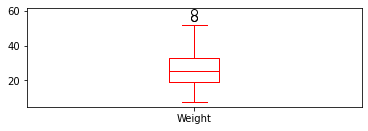

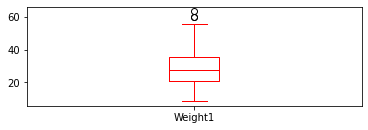

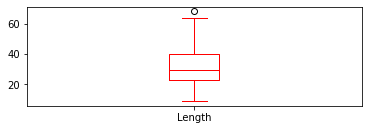

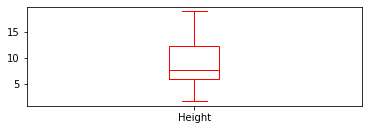

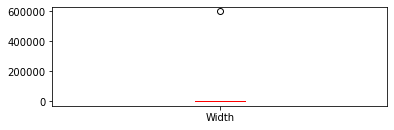

In [8]:
# Outlier Detection

column = df.columns
feature = column[1:]
print(feature)

for i in feature:
    plt.subplot(2,1,1)
    df[i].plot(kind = 'box', color='r')
    plt.show()
  

As per the boxplot shown above there are outliers available in our dataset. In the feature "Width" we have outlier point which could be an typo error as it way behyond the value range of the feature. Hence we need to remove it.


Other outliers are within the permissible range and can be left as it is.

In [9]:
# Outliers removal (IQR/Inter Quartile Range method)


i='Width'

Q1= df[i].quantile(0.25)
Q2= df[i].quantile(0.5) # This is the median or 50% of the boxplot 
Q3= df[i].quantile(0.75)
IQR = Q3-Q1
    
lower_limit = Q1 -1.5*IQR # Values below this will be considered as outiers
upper_limit = Q3 + 1.5*IQR # Values above/more than this will be considered as outliers


for j in range(len(df[i])): # Drop the row containing outlier value
    if df[i].iloc[j]< lower_limit or df[i].iloc[j]>upper_limit:
        df.drop([j],axis=0,inplace = True)
        break

for k in feature:            # replacing the null values with mean value
    df[k].fillna(df[k].mean(),inplace=True)    

            

In [10]:
df.isnull().sum()  # Counting the null value/empty values in our data

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

Null values are present in the dataset. Since all the feature contains numeric values we can replace the null with the median values of the respective feature.

As per above details there are no null values present in dataframe now.

In [11]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,390.720886,26.069231,28.215823,31.030573,8.928876,4.422621
std,345.989767,9.733870,10.448780,11.346936,4.272735,1.667513
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.025000,21.000000,23.125000,5.940600,3.398650
50%,272.500000,25.300000,27.150000,29.700000,7.733000,4.277050
75%,642.500000,32.650000,35.000000,39.575000,12.248700,5.577375
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Graphs & correlations

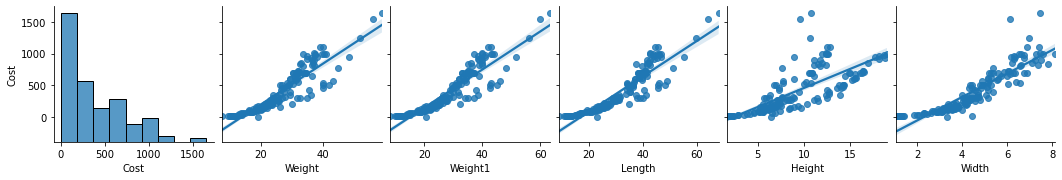

In [12]:
sns.pairplot(df, kind = 'reg', y_vars = 'Cost')  

As per the above plots between cost vs other feature it is evident that there may exist some linear relation.

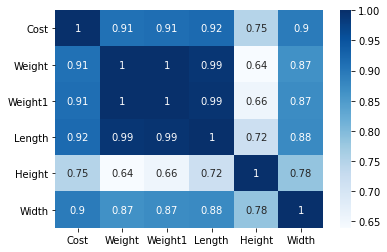

In [13]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

Above correlation heatmap shows the strong correlation between Cost and other features. Hence all the feature available should be used to create the model.

# Model Building

 lets take the 5 variables as below for the multilinear regression.

In [14]:
x1 = df['Weight']
x2 = df['Weight1']
x3 = df['Length']
x4 = df['Height']
x5 = df['Width']

# OLS Method

In [15]:
df['Ones']=1
X = df.drop(['Cost'],axis=1)
Y = df['Cost']
X = np.array(X)
Y = np.array(Y)
X_train,X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.10, random_state = 100)


In [16]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
print(model.coef_)
print(model.intercept_)

[ 14.10543388  19.42197658 -13.29946051  17.5028858   50.59338936
   0.        ]
-491.723155804471


In [18]:
Y_predict = model.predict(X_test)

print(Y_predict)

[214.3430832  528.87150539 880.71913917 602.26058339 473.80955795
 704.41320015 217.4757029  378.93298541 417.8491596  281.19767466
 799.39265846 -81.92973757 693.95426996 798.73535088 250.68819571
 190.41601427]


In [19]:
mse = metrics.mean_squared_error(Y_test, Y_predict)

print( 'MSE = ',mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('RMSE = ', rmse)
r2 = metrics.r2_score(Y_test,Y_predict)
print('R Square error = ', r2)

MSE =  9678.39283621898
RMSE =  98.37882310852768
R Square error =  0.9083216938085532


# Gradient descent

In [20]:
# Deifining the cost function
def cost(X_train,coef):
    total_cost =0
    for i in range(len(X_train)):
        total_cost += (1/len(X_train))* ((X_train[i]*coef).sum()-Y_train[i])**2
    return total_cost

    
# Gradient Descent
def GD(X_train,coef,lr,epoch):
    
    for i in range(epoch):
        derivative = np.zeros(6)
        for j in range(len(X_train)):
            for k in range(6):
                derivative[k] += (1/len(X_train))* ((X_train[j]*coef).sum()-Y_train[j])*X_train[j][k]
                      
        coef = coef - lr*derivative
        print(cost(X_train,coef))
    
    return coef
                

# Running Gradient Descent
coef = np.zeros(6)
lr = 0.0001
epoch = 555
coef = GD(X_train,coef,lr,epoch)


157849.04495265894
102283.49554420548
74041.63748902032
59686.845857064385
52390.05487732298
48680.44210999937
46793.98758202695
45834.14111723054
45345.23768179479
45095.68887195185
44967.791582644844
44901.7240740455
44867.08238437907
44848.41392114752
44837.86501529666
44831.444094713304
44827.122469646674
44823.86907087124
44821.15986245918
44818.7285044316
44816.43962888474
44814.22443351412
44812.047947496205
44809.89239461448
44807.748737689915
44805.61238110026
44803.480986617076
44801.35336332096
44799.22890340907
44797.10729544838
44794.98837863901
44792.87206874423
44790.75832044529
44788.64710820831
44786.53841655997
44784.43223514549
44782.3285562165
44780.22737335447
44778.12868082187
44776.03247323236
44773.938745383166
44771.847492169894
44769.75870854318
44767.67238948666
44765.58853000585
44763.50712512231
44761.428169870866
44759.35165929803
44757.27758846127
44755.205952428594
44753.13674627829
44751.069965098985
44749.00560398937
44746.94365805832
44744.88412242453

In [21]:

for i in range(len(X_test)):
        Y_predict[i] = coef[0]*X_test[i][0]+coef[1]*X_test[i][1]+coef[2]*X_test[i][2]+coef[3]*X_test[i][3]+coef[4]*X_test[i][4]+coef[5]*X_test[i][5]


mse = metrics.mean_squared_error(Y_test, Y_predict)

print( 'MSE = ',mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('RMSE = ', rmse)
r2 = metrics.r2_score(Y_test,Y_predict)
print('R Square error = ', r2)


MSE =  42934.31440989741
RMSE =  207.20597098032047
R Square error =  0.5933059042757208


# Stochastic Gradient descent

In [22]:
# Deifining the cost function
def cost(X_train,coef):
    total_cost =0
    for i in range(len(X_train)):
        total_cost += (1/len(X_train))* ((X_train[i]*coef).sum()-Y_train[i])**2
        return total_cost


# Stochastic Gradient Descent
def SGD(X_train,coef,lr,epoch):
    for i in range(epoch):
        derivative = np.zeros(6)
        for j in range(len(X_train)):
            for k in range(6):
                derivative[k] += (1/len(X_train))* ((X_train[j]*coef).sum()-Y[j])*X_train[j][k]
            coef = coef - lr*derivative
            print(cost(X_train,coef))
    
    return coef
                

# Running Gradient Descent
coef = np.zeros(6)
lr = 0.0001
epoch = 2
coef = SGD(X_train,coef,lr,epoch)

print(coef)


84.84685914024706
84.05304364320621
82.38444675205358
80.42019552484786
77.54347374697647
73.51047313530432
68.91202059266101
64.19472998114824
59.051862616617555
53.711481687269625
47.695521892144406
41.23119702883067
34.4809092202046
28.10847505659678
21.59930576258354
15.254441427154976
9.602063197521243
4.837530712477487
1.5355789218528504
0.045326542395865456
0.712193899468791
3.853508678456139
9.858657888756294
19.169072812889492
31.815125455909747
48.48243590523186
69.55867062764403
95.27749293549111
126.29073755493603
163.51262505246297
207.06815032649297
257.4267977055567
315.3121982252673
381.36282393611344
455.8717917856181
536.3306915110096
622.0613210642748
710.6388637490464
799.8806125590996
893.7737801159847
985.4902384414856
1072.3368768963637
1155.5327082969009
1239.5492749033488
1317.352561117448
1393.530729069865
1459.824988351233
1517.8065240872825
1576.3006141594926
1626.5624760940977
1674.103482325078
1701.5830736554994
1716.8575188763245
1729.8392797596073
1739.2

In [23]:

for i in range(len(X_test)):
        Y_predict[i] = coef[0]*X_test[i][0]+coef[1]*X_test[i][1]+coef[2]*X_test[i][2]+coef[3]*X_test[i][3]+coef[4]*X_test[i][4]+coef[5]*X_test[i][5]


mse = metrics.mean_squared_error(Y_test, Y_predict)

print( 'MSE = ',mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('RMSE = ', rmse)
r2 = metrics.r2_score(Y_test,Y_predict)
print('R Square error = ', r2)


MSE =  167861.65862860548
RMSE =  409.7092366893935
R Square error =  -0.5900648793637386


#  Mini Batch Gradient Descent

In [24]:
# Deifining the cost function
def cost(X_train,coef):
    total_cost =0
    for i in range(len(X_train)):
        total_cost += (1/len(X_train))* ((X_train[i]*coef).sum()-Y_train[i])**2
        return total_cost


    
# Stochastic Gradient Descent
def SGD(X_train,coef,lr,epoch,batch_size):
    for i in range(epoch):
        derivative = np.zeros(6)
        for j in range(len(X_train)):
            for k in range(6):
                derivative[k] += (1/len(X_train))* ((X_train[j]*coef).sum()-Y[j])*X_train[j][k]
            
            if (j%batch_size==0):  # Interation in cofficient value once cost for a perticular batch is calculated
                coef = coef - lr*derivative
                print(cost(X_train,coef))
    
    return coef
                

# Running Gradient Descent
coef = np.zeros(6)
lr = 0.0001
epoch = 1
Batch_size = 12
coef = SGD(X_train,coef,lr,epoch, Batch_size)

print(coef)

84.84685914024706
74.56818647372815
50.93668558581106
20.8423451765871
3.836539144692285
0.9729477405705549
15.128412791846095
43.6633850402893
83.76353710823477
136.01535109413945
215.49189182544606
327.39380852965724
[4.54637786 4.91696592 5.38403868 1.51629887 0.77075738 0.16587551]


In [25]:

for i in range(len(X_test)):
        Y_predict[i] = coef[0]*X_test[i][0]+coef[1]*X_test[i][1]+coef[2]*X_test[i][2]+coef[3]*X_test[i][3]+coef[4]*X_test[i][4]+coef[5]*X_test[i][5]


mse = metrics.mean_squared_error(Y_test, Y_predict)

print( 'MSE = ',mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('RMSE = ', rmse)
r2 = metrics.r2_score(Y_test,Y_predict)
print('R Square error = ', r2)


MSE =  45718.97828325844
RMSE =  213.81996698919033
R Square error =  0.5669282534051258


# Conclusion

As we used 4 different method to form the best model we found out that out of OLS and Gradient Descent, OLS provides more accuracy and suits way better.

However to customize the itteration process Gradient Descent methods are to be used.